In [93]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit

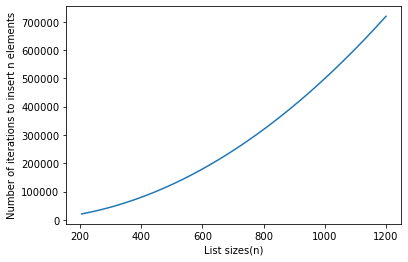

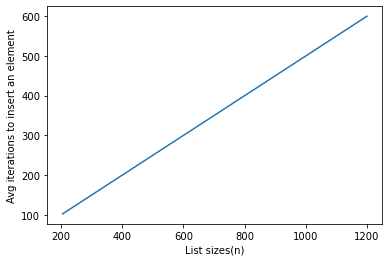

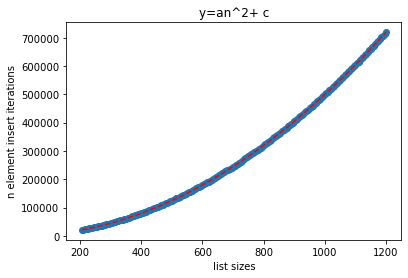

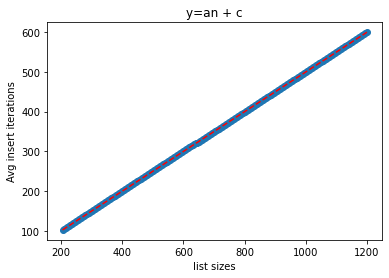

In [94]:
#SINGLY LINKED LISTS
class node:
    def __init__(self,val):
        self.value=val
        self.next=None #next hold the link to the next node


def enlist(val,head,tail):
    iterations=0
    if(head==None):
        new_node=node(val)
        head=new_node
        tail=new_node
        return iterations
    curr_node=head
    while(curr_node.next!=None):
        iterations+=1
        curr_node=curr_node.next
    new_node=node(val) #creating new node with given value
    curr_node.next=new_node #updating the next pointer of last node to point to the new node
    tail=new_node #updating the value of tail
    return iterations
#For deleting a node from the list, we assume we are given its key-value
def delist(val,head,tail):
    iterations=0
    if(head==None):
        print("List already empty")
        return iterations
    curr_node=head
    #We will first find the location of the node that is previous to the node to be deleted. 
    while(curr_node.next.value!=val):
        iterations+=1
        curr_node=curr_node.next
        if(tail==curr_node and curr_node.value!=val):
            #print("Node cannot be deleted, not present in list")
            return iterations
    if(curr_node.next==tail):
        tail=curr_node #if the node to be deleted is the last node, then we update the value of tail
    curr_node.next=curr_node.next.next #Now we update the next pointer of curr_node to point to the next but next node
    #Thus the desired node is deleted.
    return iterations
    
def search_list(val,head,tail):
    curr_node=head
    #We iterate through the nodes and find 
    while(curr_node.value!=val):
        curr_node=curr_node.next
        if(tail==curr_node and curr_node.value!=val):
            #print(val,"is not present in the list")
            return
    #print("Found",val)
    return curr_node
    
    
########################################################    
inp_sizes=[]
unit_size=5
for i in range(int(1000/unit_size)):
    inp_sizes.append(200+unit_size*(i+1))
enlist_times=[]

for n in inp_sizes:
    head=node(0)
    tail=node(0)
    iterations=0
    for i in range(n):
        iters=enlist(0.09*(i+1),head,tail)
        iterations+=iters
    enlist_times.append(iterations)

avg_enlist_times=[]
for i in range(len(inp_sizes)):
    avg_enlist_times.append(enlist_times[i]/inp_sizes[i])

pa=plt.figure(1)
plt.plot(inp_sizes,enlist_times)
plt.xlabel("List sizes(n)")
plt.ylabel("Number of iterations to insert n elements")

pb=plt.figure(2)
plt.plot(inp_sizes,avg_enlist_times)
plt.xlabel("List sizes(n)")
plt.ylabel("Avg iterations to insert an element")

###########################################################
# The runtime to insert n elements into a linked list seems to be O(n^2)
# We will try to fit a quadratic curve and examine

def quadratic(x,a,c):
    return a*(x**2)+c

y=enlist_times
x=np.arange(min(inp_sizes),max(inp_sizes)+unit_size,unit_size)
parameters,_=curve_fit(quadratic,x,y)
a,c=parameters

y1=[]
for j in inp_sizes:
    y1.append(quadratic(j,a,c))

p1=plt.figure(3)   
plt.plot(x,y1,'--',color = 'red')
plt.title("y=an^2+ c")
plt.ylabel("n element insert iterations")
plt.xlabel("list sizes")
plt.scatter(x,y)

##########################################################
# The avg runtime to insert element into a linked list seems to be O(n)
# We will fit a linear curve and examine

def linear(x,a,c):
    return x*a+c

y=avg_enlist_times
x=np.arange(min(inp_sizes),max(inp_sizes)+unit_size,unit_size)
parameters,_=curve_fit(linear,x,y)
a,c=parameters

y2=[]
for j in inp_sizes:
    y2.append(linear(j,a,c))

p2=plt.figure(4)   
plt.plot(x,y2,'--',color = 'red')
plt.title("y=an + c")
plt.ylabel("Avg insert iterations")
plt.xlabel("list sizes")
plt.scatter(x,y)

################################################################
# Similarly, the times for searching and deleting nodes can be calculated and plotted 
# To reveal that both of these algorithms also perform in O(n)

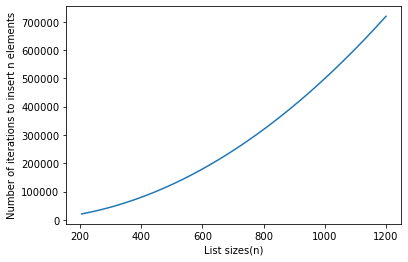

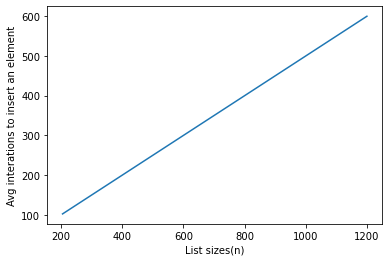

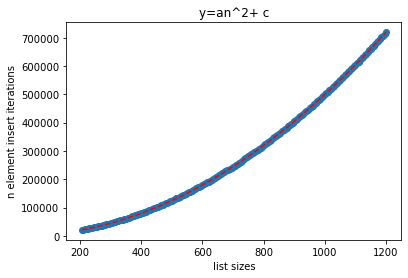

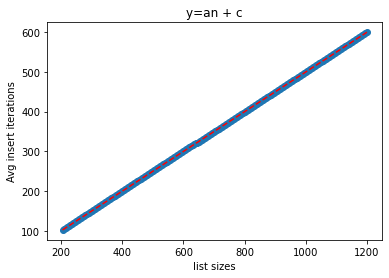

In [95]:
#DOUBLY LINKED LIST
#Runtime is a linear measure of number of iterations performed here
class node:
    def __init__(self,val):
        self.value=val
        self.next=None #next holds the link to the next node
        self.prev=None #prev holds the link to previous node

def enlist(val,head,tail):
    iterations=0
    if(head==None):
        new_node=node(val)
        head=new_node
        tail=new_node
        return iterations
    curr_node=head
    while(curr_node.next!=None):
        iterations+=1
        curr_node=curr_node.next
    new_node=node(val) #creating new node with given value
    curr_node.next=new_node #updating the next pointer of last node to point to the new node
    new_node.prev=curr_node #updating the prev pointer of new node to point to the former last node
    tail=new_node #updating the value of tail
    return iterations
#For deleting a node from the list, we assume we are given its key-value
def delist(val,head,tail):
    iterations=0
    if(head==None):
        print("List already empty")
        return iterations
    curr_node=head
    #We will first find the location of the node that is previous to the node to be deleted. 
    while(curr_node.next.value!=val):
        iterations+=1
        curr_node=curr_node.next
        if(tail==curr_node and curr_node.value!=val):
            #print("Node cannot be deleted, not present in list")
            return iterations
    if(curr_node.next==tail):
        tail=curr_node #if the node to be deleted is the last node, then we update the value of tail
    curr_node.next=curr_node.next.next #Now we update the next pointer of curr_node to point to the next but next node
    curr_node.next.prev=curr_node #Updating the prev pointer of the successor node to point to predecessor node
    #Thus the desired node is deleted.
    return iterations
    
def search_list(val,head,tail):
    curr_node=head
    #We iterate through the nodes and find 
    while(curr_node.value!=val):
        curr_node=curr_node.next
        if(tail==curr_node and curr_node.value!=val):
            #print(val,"is not present in the list")
            return
    #print("Found",val)
    return curr_node


#############################################################
inp_sizes=[]
unit_size=5
for i in range(int(1000/unit_size)):
    inp_sizes.append(200+unit_size*(i+1))
enlist_times=[]

for n in inp_sizes:
    head=node(0)
    tail=node(0)
    iterations=0
    for i in range(n):
        iters=enlist(0.09*(i+1),head,tail)
        iterations+=iters
    enlist_times.append(iterations)

avg_enlist_times=[]
for i in range(len(inp_sizes)):
    avg_enlist_times.append(enlist_times[i]/inp_sizes[i])

pa=plt.figure(1)
plt.plot(inp_sizes,enlist_times)
plt.xlabel("List sizes(n)")
plt.ylabel("Number of iterations to insert n elements")

pb=plt.figure(2)
plt.plot(inp_sizes,avg_enlist_times)
plt.xlabel("List sizes(n)")
plt.ylabel("Avg interations to insert an element")

###########################################################
# The runtime to insert n elements into a linked list seems to be O(n^2)
# We will try to fit a quadratic curve and examine

def quadratic(x,a,c):
    return a*(x**2)+c

y=enlist_times
x=np.arange(min(inp_sizes),max(inp_sizes)+unit_size,unit_size)
parameters,_=curve_fit(quadratic,x,y)
a,c=parameters

y1=[]
for j in inp_sizes:
    y1.append(quadratic(j,a,c))

p1=plt.figure(3)   
plt.plot(x,y1,'--',color = 'red')
plt.title("y=an^2+ c")
plt.ylabel("n element insert iterations")
plt.xlabel("list sizes")
plt.scatter(x,y)

##########################################################
# The avg runtime to insert element into a linked list seems to be O(n)
# We will fit a linear curve and examine

def linear(x,a,c):
    return x*a+c

y=avg_enlist_times
x=np.arange(min(inp_sizes),max(inp_sizes)+unit_size,unit_size)
parameters,_=curve_fit(linear,x,y)
a,c=parameters

y2=[]
for j in inp_sizes:
    y2.append(linear(j,a,c))

p2=plt.figure(4)   
plt.plot(x,y2,'--',color = 'red')
plt.title("y=an + c")
plt.ylabel("Avg insert iterations")
plt.xlabel("list sizes")
plt.scatter(x,y)

################################################################
# Similarly, the times for searching and deleting nodes can be calculated and plotted 
# To reveal that both of these algorithms also perform in O(n)